# Modeling

*prose* does not implement a modeling framework, many options are currently available in python. However, it features some tools to aid in selecting the right model, mainly linear ones.

In this tutorial we will review some of these tools and show how the prose products can conveniently be used within `exoplanet`, itself using the `pymc3` inference framework.

## Making up some data

As usual we will work on simulated data. Here we propose to analyse a planetary transit light curve in which we added some instrumental signals 
> TODO - in the meanwhile

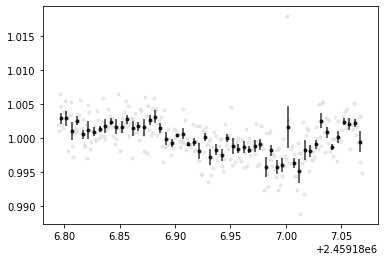

In [9]:
from prose import load

obs = load("...phot")
obs.plot()

## Linear models

### Polynomial systematics

It is common to model the instrumental signals using a polynomial model dependant on the systematics measurements.

> TO DO: put some algebra basics

Before doing any of that let's remove some obvious outliers and prepare our light-curve

In [10]:
obs = obs.sigma_clip()

We can now use prose methods to build a linear model by defining its *design matrix*

(0.98, 1.02)

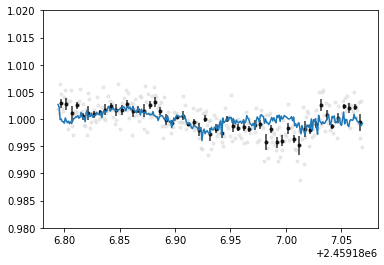

In [12]:
from prose import models
import matplotlib.pyplot as plt

dm = models.design_matrix([
    models.constant(obs.time),
    models.polynomial(obs.dy, 2)
])

trend = obs.trend(dm)

obs.plot()
plt.plot(obs.time, trend)
plt.ylim(0.98, 1.02)

### Adding a transit

Our data contains a transit signal which, at first order, can be modeled as a scaled transit of unitary depth. To do that we will add this template to our design matrix. Here, we will use the more conveniant `Observation.polynomial()` method which comes handy for more complex models.

In [64]:
import numpy as np

t0 = 2459187.
duration = 0.035

dm = np.hstack([
    obs.polynomial(sky=2, dy=2),
    obs.transit(t0, duration)
])

# Notice the use of split to get the transit model
trend, transit = _trend(obs, dm, split=-1)

Let's do a nice plot

Text(0.0, 1.0, 'detrended')

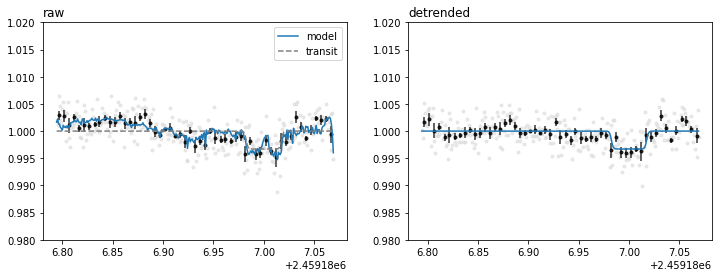

In [78]:
plt.figure(figsize=(12,4))

plt.subplot(121)
obs.plot()
plt.plot(obs.time, transit + trend, label="model")
plt.plot(obs.time, transit + 1., "--", color="0.5", label="transit")
plt.ylim(0.98, 1.02)
plt.title("raw", loc="left")
plt.legend()

plt.subplot(122)
viz.plot_lc(obs.time, obs.flux - trend + 1.)
plt.plot(obs.time, transit + 1., label="transit")
plt.ylim(0.98, 1.02)
plt.title("detrended", loc="left")

### Using the BIC

We used an arbitrary model. To choose a bit more "wisely" we could use the AIC or BIC. Here we will iterate on a range of possible polynomial order combinations and compute which one gives the best BIC:

> TO DO

This combination can be used within the next step when we doing a fully bayesian modeling of our data with `exoplanet`

## Bayesian modeling

> TO DO